In [1]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a =['000270','003490','005490','005300','000150','004360','005610','009450','002240']
dfs = []
for i in range(10):
    df = pd.DataFrame
    dfs.append(df)

In [3]:
for i in range(9):
     dfs[i]= fdr.DataReader(a[i], '2000-05-04', '2020-01-22')

In [4]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [5]:
dfxs = []
dfys = []
for i in range(9):
    dfx = dfs[i][['Open','High','Low','Volume', 'Close']]
    dfx = MinMaxScaler(dfx)
    dfy = dfx[['Close']]
    dfys.append(dfy)
    dfx = dfx[['Open','High','Low','Volume']]
    dfxs.append(dfx)
dfxs[3]


,Open,High,Low,Volume
Date,,,,
2000-05-04,0.026132,0.024346,0.026089,0.067351
2000-05-08,0.025624,0.024078,0.025904,0.080677
2000-05-09,0.025733,0.024078,0.025571,0.098085
2000-05-10,0.025334,0.023342,0.024979,0.037577
2000-05-12,0.024934,0.023710,0.025238,0.061948
...,...,...,...,...
2020-01-16,0.488161,0.449794,0.488484,0.133057
2020-01-17,0.482717,0.446449,0.484783,0.168137
2020-01-20,0.489975,0.486580,0.484783,0.830818


In [6]:
xs=[]
ys=[]
for i in range(9):
    X = dfxs[i].values.tolist()
    y = dfys[i].values.tolist()
    xs.append(X)
    ys.append(y)


In [7]:
window_size = 100

Xx = []
Yy =[] 
 
for i in range(9):
    linex = [] 
    liney = []
    X=xs[i]
    Y=ys[i]
    b=len(ys[i])
    for j in range(b-window_size):
         
        _X = X[j : j + window_size] 
        _y = Y[j + window_size]   
        linex.append(_X)
        liney.append(_y)  
    
    Xx.append(linex)
    Yy.append(liney)
Yy

[[[0.012706480304939382],
  [0.01130876747139605],
  [0.012452350698840594],
  [0.009402795425655143],
  [0.010165184243951506],
  [0.009783989834803324],
  [0.004066073697580603],
  [0.010165184243951506],
  [0.0102922490470009],
  [0.008894536213457567],
  [0.009402795425655143],
  [0.007242693773815447],
  [0.010165184243951506],
  [0.009529860228704536],
  [0.011435832274445444],
  [0.008894536213457567],
  [0.009402795425655143],
  [0.007878017789062417],
  [0.010165184243951506],
  [0.012706480304939382],
  [0.02033036848790301],
  [0.025412960609878764],
  [0.0246505717915824],
  [0.020076238881804223],
  [0.02299872935194028],
  [0.02731893265561967],
  [0.02731893265561967],
  [0.030495552731854517],
  [0.030495552731854517],
  [0.03519695044468209],
  [0.03532401524773148],
  [0.03659466327822542],
  [0.03646759847517603],
  [0.036721728081274815],
  [0.03659466327822542],
  [0.03570520965687966],
  [0.03659466327822542],
  [0.03557814485383027],
  [0.03557814485383027],
  [0

In [8]:
train_X=[]
train_y=[]
test_X=[]
test_y=[]

for i in range(9):
    train_size = int(len(Yy[i]) * 0.7)
    train_X.append(np.array(Xx[i][0 : train_size]))
    train_y.append(np.array(Yy[i][0 : train_size]))
    test_size = len(Xx[i]) - train_size
    test_X.append(np.array(Xx[i][train_size : len(Xx[i])]))
    test_y.append(np.array(Yy[i][train_size : len(Yy[i])]))
train_y

[array([[0.01270648],
        [0.01130877],
        [0.01245235],
        ...,
        [0.6111817 ],
        [0.59974587],
        [0.61499365]]),
 array([[0.02714024],
        [0.02604067],
        [0.02836199],
        ...,
        [0.29374291],
        [0.28313116],
        [0.29829828]]),
 array([[0.03026874],
        [0.02942008],
        [0.03026874],
        ...,
        [0.33239038],
        [0.32956153],
        [0.3281471 ]]),
 array([[0.01731044],
        [0.01712431],
        [0.01563524],
        ...,
        [0.53871955],
        [0.53499687],
        [0.54430356]]),
 array([[0.04715362],
        [0.04594156],
        [0.04230109],
        ...,
        [0.42731994],
        [0.44261079],
        [0.44091133]]),
 array([[0.03547073],
        [0.0347842 ],
        [0.0363861 ],
        ...,
        [0.80090622],
        [0.79861779],
        [0.78946405]]),
 array([[0.01783539],
        [0.01761282],
        [0.01615996],
        ...,
        [0.15103339],
        [0.149565

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [10]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(100, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 20)           2000      
                                                                 
 dropout (Dropout)           (None, 100, 20)           0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [11]:
pred_y= []
model_fit = []
for i in range(9):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model_fit.append(model.fit(train_X[i], train_y[i], epochs=1, batch_size=30))
    pred_y.append(np.array(model.predict(test_X[i])))

45/45 [==============================] - 0s 7ms/step


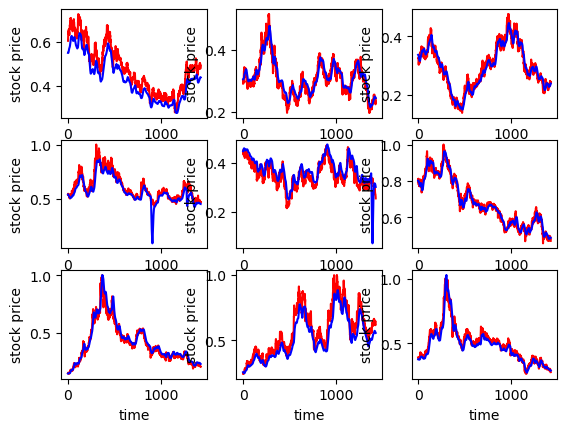

In [13]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.plot(test_y[i], color='red', label='real SEC stock price')
    plt.plot(pred_y[i], color='blue', label='predicted SEC stock price')
    plt.xlabel('time')
    plt.ylabel('stock price')




plt.show()

In [14]:
pred_y[0][-1]

array([0.4377742], dtype=float32)

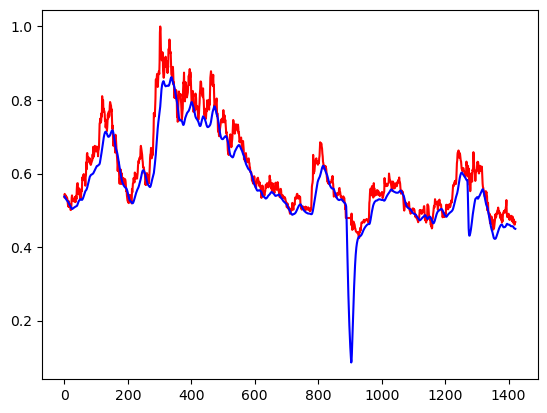

In [18]:
    plt.plot(test_y[3], color='red', label='real SEC stock price')
    plt.plot(pred_y[3], color='blue', label='predicted SEC stock price')

In [22]:
!pip install lightgbm

  Using cached lightgbm-3.3.5-py3-none-win_amd64.whl (1.0 MB)


In [21]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'lightgbm'

In [20]:
for i in range(9):
    lgbm_wrapper = LGBMClassifier(n_estimators=500)
    evals=[(train_X[i],train_y[i])]
    lgbm_wrapper.fit(train_X[i], train_y[i], early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
    preds = lgbm_wrapper.predict(x_test)

NameError: name 'LGBMClassifier' is not defined

In [17]:
df

,ARIMA 예측값,실제값
0,"[[0.5495783], [0.54932666], [0.54929036], [0.5...","[[0.6048284625151146], [0.6200762388810418], [..."
1,"[[0.30557784], [0.30571574], [0.3060164], [0.3...","[[0.29173575355564757], [0.30082904267335575],..."
2,"[[0.33717299], [0.33680975], [0.33644897], [0....","[[0.3260254596887799], [0.3274398868457811], [..."
3,"[[0.5376368], [0.5360087], [0.5345757], [0.533...","[[0.5357414080646049], [0.5446758294119123], [..."
4,"[[0.44666377], [0.44810018], [0.4497143], [0.4...","[[0.4443102511234378], [0.4443102511234378], [..."
5,"[[0.80130535], [0.7995496], [0.79789066], [0.7...","[[0.7963293514540879], [0.7986177857073613], [..."
6,"[[0.14909527], [0.14970209], [0.15026306], [0....","[[0.15176715176711464], [0.15127797480734956],..."
7,"[[0.2565309], [0.2558408], [0.25499657], [0.25...","[[0.24531066822941777], [0.24897420867489892],..."
8,"[[0.37651232], [0.3764356], [0.37644666], [0.3...","[[0.39121316527126365], [0.38736116758247047],..."
